In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

In [3]:
df = pd.read_csv('F:/train.csv')
df_test = pd.read_csv('F:/test.csv')
submission = pd.read_csv('F:/sample_submission.csv')

In [6]:
useful_features = [c for c in df.columns if c not in ['id', 'Attrition']]

In [7]:
categorical_cols = [cname for cname in df.columns if df[cname].nunique() < 10 and 
                        df[cname].dtype == 'object']
df_test = df_test[useful_features]

In [8]:
df = pd.read_csv('F:/train.csv')
data = pd.DataFrame(df)
data

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0


In [9]:
data.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [11]:
data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [12]:
BusinessTravel = data.groupby('BusinessTravel')['BusinessTravel'].count()
BusinessTravel

BusinessTravel
Non-Travel            126
Travel_Frequently     261
Travel_Rarely        1290
Name: BusinessTravel, dtype: int64

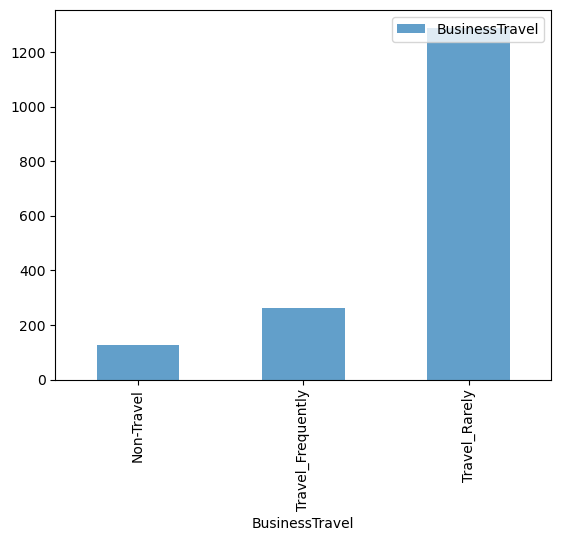

In [13]:
BusinessTravel.plot(kind = 'bar', alpha = 0.7)
plt.legend(loc = 'upper right')

In [14]:
Department = data.groupby('Department')['Department'].count()
Department

Department
Human Resources             39
Research & Development    1167
Sales                      471
Name: Department, dtype: int64

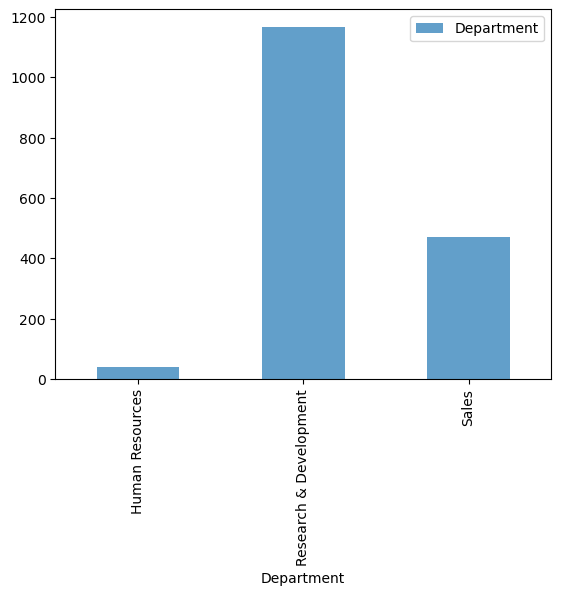

In [15]:
Department.plot(kind = 'bar', alpha = 0.7)
plt.legend(loc = 'upper right')

In [16]:
EducationField = data.groupby('EducationField')['EducationField'].count()
EducationField

EducationField
Human Resources      13
Life Sciences       775
Marketing           152
Medical             549
Other                82
Technical Degree    106
Name: EducationField, dtype: int64

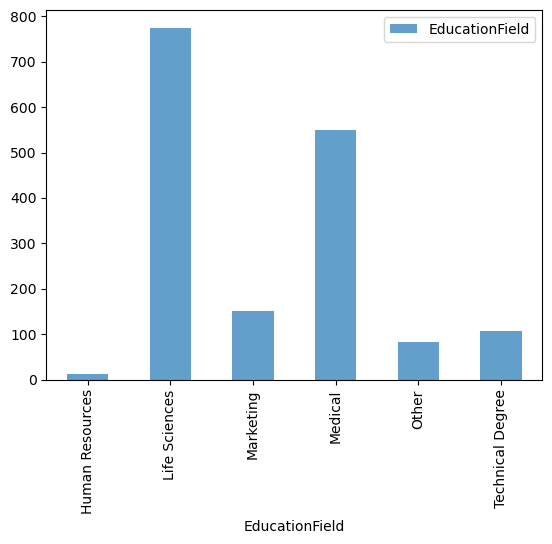

In [17]:
EducationField.plot(alpha = 0.7, kind = 'bar')
plt.legend(loc = 'upper right')

In [18]:
Gender = data.groupby('Gender')['Gender'].count()
Gender

Gender
Female     613
Male      1064
Name: Gender, dtype: int64

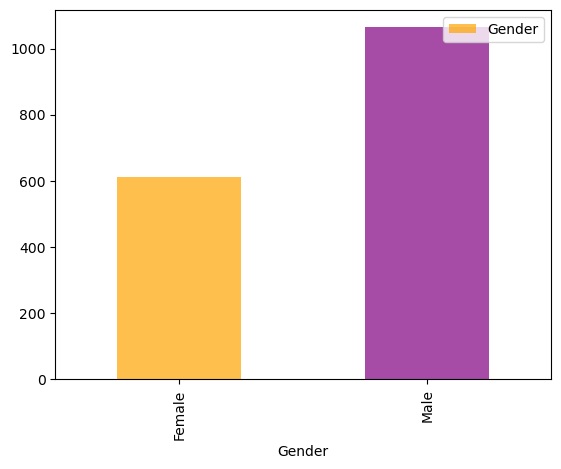

In [19]:
color = ['orange', 'purple']
Gender.plot(alpha = 0.7, kind = 'bar', color = color)
plt.legend(loc = 'upper right')

In [20]:
JobRole = data.groupby('JobRole')['JobRole'].count()
JobRole

JobRole
Healthcare Representative    155
Human Resources               34
Laboratory Technician        334
Manager                      111
Manufacturing Director       196
Research Director             71
Research Scientist           344
Sales Executive              355
Sales Representative          77
Name: JobRole, dtype: int64

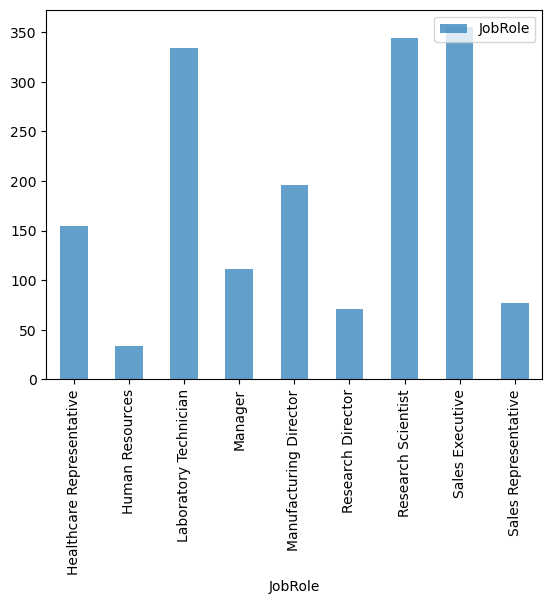

In [21]:
JobRole.plot(alpha = 0.7, kind = 'bar')
plt.legend(loc = 'upper right')

In [22]:
MaritalStatus = data.groupby('MaritalStatus')['MaritalStatus'].count()
MaritalStatus

MaritalStatus
Divorced    327
Married     773
Single      577
Name: MaritalStatus, dtype: int64

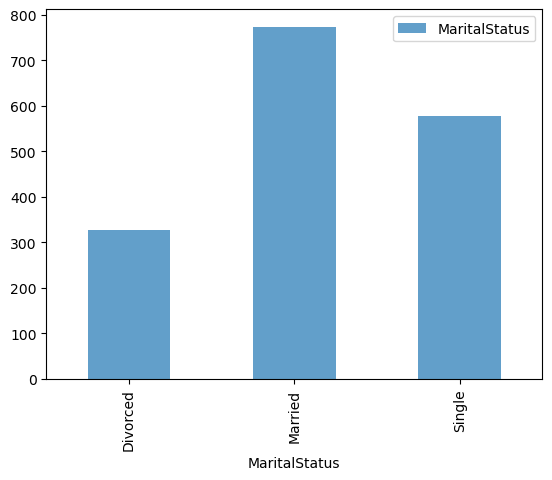

In [23]:
MaritalStatus.plot(alpha=0.7, kind = 'bar')
plt.legend(loc='upper right')

In [24]:
OverTime = data.groupby('OverTime')['OverTime'].count()
OverTime

OverTime
No     1277
Yes     400
Name: OverTime, dtype: int64

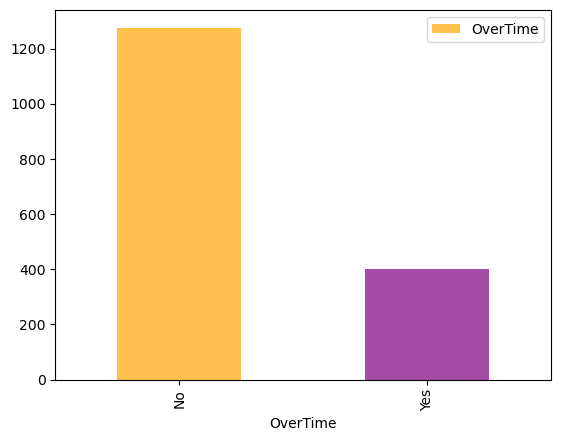

In [25]:
color = ['orange', 'purple']
OverTime.plot(alpha = 0.7, kind = 'bar', color = color)
plt.legend(loc = 'upper right')

In [26]:
Age_DailyRate = data.groupby('Age')['DailyRate'].sum()

<AxesSubplot:xlabel='Age'>

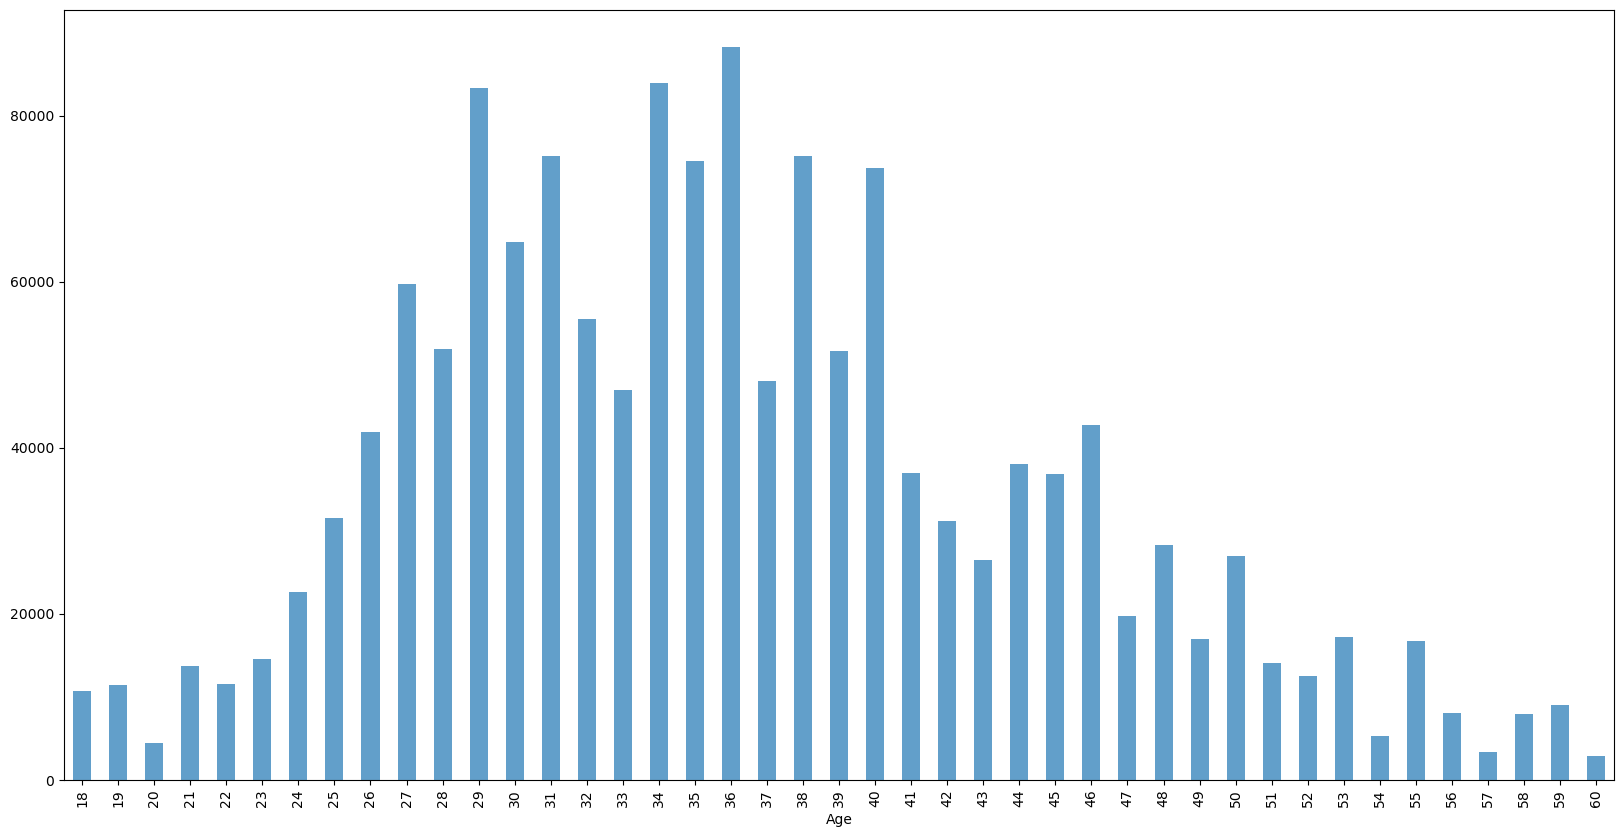

In [27]:
Age_DailyRate.plot(kind = 'bar', alpha = 0.7, figsize = (20, 10))

In [28]:
print(data)

        id  Age     BusinessTravel  DailyRate              Department  \
0        0   36  Travel_Frequently        599  Research & Development   
1        1   35      Travel_Rarely        921                   Sales   
2        2   32      Travel_Rarely        718                   Sales   
3        3   38      Travel_Rarely       1488  Research & Development   
4        4   50      Travel_Rarely       1017  Research & Development   
...    ...  ...                ...        ...                     ...   
1672  1672   30      Travel_Rarely        945                   Sales   
1673  1673   32      Travel_Rarely       1303  Research & Development   
1674  1674   29  Travel_Frequently       1184         Human Resources   
1675  1675   36      Travel_Rarely        441                   Sales   
1676  1676   36      Travel_Rarely       1141  Research & Development   

      DistanceFromHome  Education   EducationField  EmployeeCount  \
0                   24          3          Medical    

In [30]:
display(df.describe(include='object'))
display(df_test.describe(include='object'))

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1677,1677,1677,1677,1677,1677,1677,1677
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1290,1167,775,1064,355,773,1677,1277


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1119,1119,1119,1119,1119,1119,1119,1119
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,799,777,519,690,240,524,1119,852


In [33]:
y_pred = np.zeros(len(df_test))
scores = []

X = df.drop(['id'], axis = 1)
y = df.Attrition

kf = model_selection.StratifiedKFold(n_splits=10, random_state = 42, shuffle = True)
for idx in kf.split(X,y):
    
    train_idx, valid_idx = idx[0], idx[1]
    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_valid, y_valid = X.loc[valid_idx], y.loc[valid_idx]
    
    X_valid = X_valid[useful_features]
    X_test = df_test.copy()

    for col in categorical_cols:
   
        feat = X_train.groupby(col)['Attrition'].agg('mean')
        feat = feat.to_dict()
        
        X_train.loc[:, col] = X_train[col].map(feat)
        X_valid.loc[:, col] = X_valid[col].map(feat)
        X_test.loc[:, col] = X_test[col].map(feat)
    
    X_train = X_train[useful_features]

    model = RandomForestClassifier(n_estimators=400, criterion = 'entropy', max_depth= 10)

    model.fit(X_train, y_train)
        
    final_preds = model.predict_proba(X_valid)[:,1]
    fold_score = metrics.roc_auc_score(y_valid, final_preds)
    scores.append(fold_score)
    y_pred += model.predict_proba(X_test)[:,1] / kf.n_splits 
    

In [34]:
print(scores)

[0.7972972972972973, 0.7787162162162162, 0.8506756756756757, 0.893581081081081, 0.7652027027027026, 0.7658783783783785, 0.839527027027027, 0.8183673469387756, 0.9380952380952381, 0.8003401360544218]


In [35]:
print(data)

        id  Age     BusinessTravel  DailyRate              Department  \
0        0   36  Travel_Frequently        599  Research & Development   
1        1   35      Travel_Rarely        921                   Sales   
2        2   32      Travel_Rarely        718                   Sales   
3        3   38      Travel_Rarely       1488  Research & Development   
4        4   50      Travel_Rarely       1017  Research & Development   
...    ...  ...                ...        ...                     ...   
1672  1672   30      Travel_Rarely        945                   Sales   
1673  1673   32      Travel_Rarely       1303  Research & Development   
1674  1674   29  Travel_Frequently       1184         Human Resources   
1675  1675   36      Travel_Rarely        441                   Sales   
1676  1676   36      Travel_Rarely       1141  Research & Development   

      DistanceFromHome  Education   EducationField  EmployeeCount  \
0                   24          3          Medical    

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [37]:
print(y_pred)
print(submission)

[0.23898935 0.06006522 0.06012716 ... 0.02041604 0.03070095 0.026786  ]
        id  Attrition
0     1677   0.119261
1     1678   0.119261
2     1679   0.119261
3     1680   0.119261
4     1681   0.119261
...    ...        ...
1114  2791   0.119261
1115  2792   0.119261
1116  2793   0.119261
1117  2794   0.119261
1118  2795   0.119261

[1119 rows x 2 columns]


In [38]:
model.score(X_train, y_train)

0.9854304635761589

In [39]:
import pickle
pickle.dump(model, open('EmployeeData_prediction.h5', 'wb'))

In [40]:
submission['Attrition'] = y_pred
submission.to_csv('sample_submission.csv',index = False)
print('Successfully Saved!')

Successfully Saved!
